### Building the hyperbola equation


In [101]:
import sympy as sp
from IPython.display import display,Markdown,Latex
t,x=sp.symbols("t x",real=True)
c,a_0=sp.symbols("c a_0",positive=True)


hyperbola=sp.Eq(-(c*t)**2 +x**2 ,(c**4)/a_0**2)
display(hyperbola)


Eq(-c**2*t**2 + x**2, c**4/a_0**2)

### Calculating the velocity

In [102]:
dx_dt=sp.idiff(hyperbola.lhs -hyperbola.rhs,x,t)
dx_dt=dx_dt.subs(x,sp.solve(hyperbola,x)[1])
sp.Eq(sp.Symbol("v"),dx_dt)


Eq(v, a_0*c*t/sqrt(a_0**2*t**2 + c**2))

### Checking the Newtonian limit

In [103]:
display(Markdown(r"For $\frac{a_0}{c}<<1$ we can expand:"))
display(dx_dt.series(a_0,0,7))
display(Markdown(r"And for $c \to \infty$"))
sp.limit(dx_dt,c,sp.oo)

For $\frac{a_0}{c}<<1$ we can expand:

a_0*t - a_0**3*t**3/(2*c**2) + 3*a_0**5*t**5/(8*c**4) + O(a_0**7)

And for $c \to \infty$

a_0*t

### Calculating the proper time

In [130]:
gamma=1/sp.sqrt(1-(dx_dt/c)**2)
T,tau=sp.symbols("T tau",real=True)
proper_time=sp.Eq(tau,sp.integrate(1/gamma,(t,-T/2,T/2)))
display(proper_time)



Eq(tau, 2*c*asinh(T*a_0/(2*c))/a_0)

### Plotting the proper time

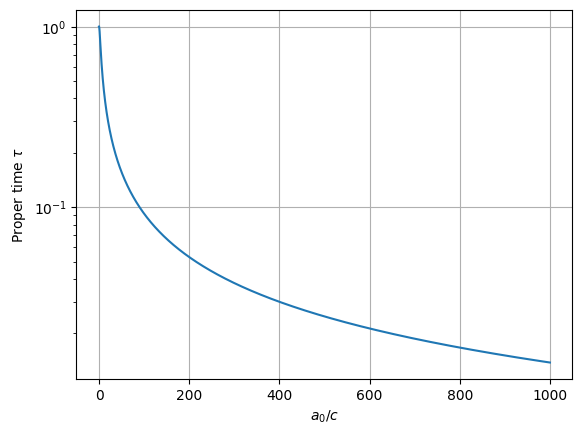

In [145]:
import numpy as np
import matplotlib.pyplot as plt

proper_time_func=sp.lambdify((a_0),proper_time.rhs.subs({c:1,T:1}))
accelerations=np.linspace(0.001,1000,10000)
plt.grid()
plt.yscale("log")
plt.ylabel(r"Proper time $\tau$")
plt.xlabel(r"$a_0/c$")
plt.plot(accelerations,proper_time_func(accelerations))